[simple autoencoder](https://blog.keras.io/building-autoencoders-in-keras.html)

In [2]:
%matplotlib inline

from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# intermediate result
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# # create a placeholder for an encoded (32-dimensional) input
# encoded_input = Input(shape=(encoding_dim,))
# # retrieve the last layer of the autoencoder model
# decoder_layer = autoencoder.layers[-1]
# # create the decoder model
# decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [26]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [27]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.3653 - val_loss: 0.2719
Epoch 2/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2648 - val_loss: 0.2538
Epoch 3/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2428 - val_loss: 0.2299
Epoch 4/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2221 - val_loss: 0.2123
Epoch 5/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2073 - val_loss: 0.1999
Epoch 6/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1967 - val_loss: 0.1907
Epoch 7/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1885 - val_loss: 0.1836
Epoch 8/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.1818 - val_loss: 0.1773
Epoch 9/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.1761 - val_loss: 0.1721
Epoch

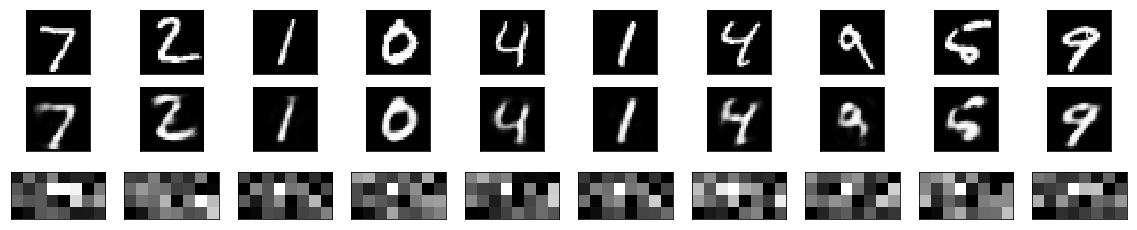

In [30]:
reconst_test = autoencoder.predict(x_test)

n = 10
row = 3

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(row, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(row, n, i + 1 + n)
    plt.imshow(reconst_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(row, n, i + 1 + 2*n)
    plt.imshow(encode_test[i].reshape(4, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [29]:
encoder.predict(x_test)

array([[ 1.431993 ,  6.645456 ,  2.4090602, ...,  1.4029974,  1.4363133,
         2.4139123],
       [ 4.7513146,  4.3695154,  9.146627 , ...,  5.595906 ,  6.136414 ,
        14.808742 ],
       [ 3.6031504,  0.       ,  3.998704 , ...,  3.6899908,  4.0623784,
         7.0528717],
       ...,
       [16.577694 ,  9.5734005,  5.906032 , ...,  5.6348696,  5.149393 ,
         6.0709825],
       [ 9.913869 ,  1.757476 ,  5.1051507, ..., 11.149484 ,  3.3895328,
        16.867033 ],
       [25.398102 , 11.799942 , 13.126756 , ...,  8.745252 , 13.459055 ,
        18.79184  ]], dtype=float32)